In [1]:
import pandas as pd

In [2]:
result = pd.read_json("result.json", lines=True)
result

latency  bandwidth        size    duration
0           1         10        1000    0.013835
1           1         10       10000    0.021257
2           1         10      100000    0.095484
3           1         10     1000000    0.837752
4           1         10    10000000    8.260433
...       ...        ...         ...         ...
1395      491      10000      100000    6.411323
1396      491      10000     1000000    6.622037
1397      491      10000    10000000    8.729180
1398      491      10000   100000000   29.800614
1399      491      10000  1000000000  240.514955

[1400 rows x 4 columns]

In [3]:
# some human readable transformation
result["bandwidth(MB/s)"] = result["bandwidth"] / 8
# size is in Byte in our simulation
result["size(MB)"] = result["size"] / 1e6 
result["duration(s)"] = result["duration"]
result["latency(ms)"] = result["latency"]
# compute the observed bandwidth for each transfer == size / duration (here un MB/s)
result["rate(MB/s)"] = (result["size(MB)"] / result["duration(s)"]) 


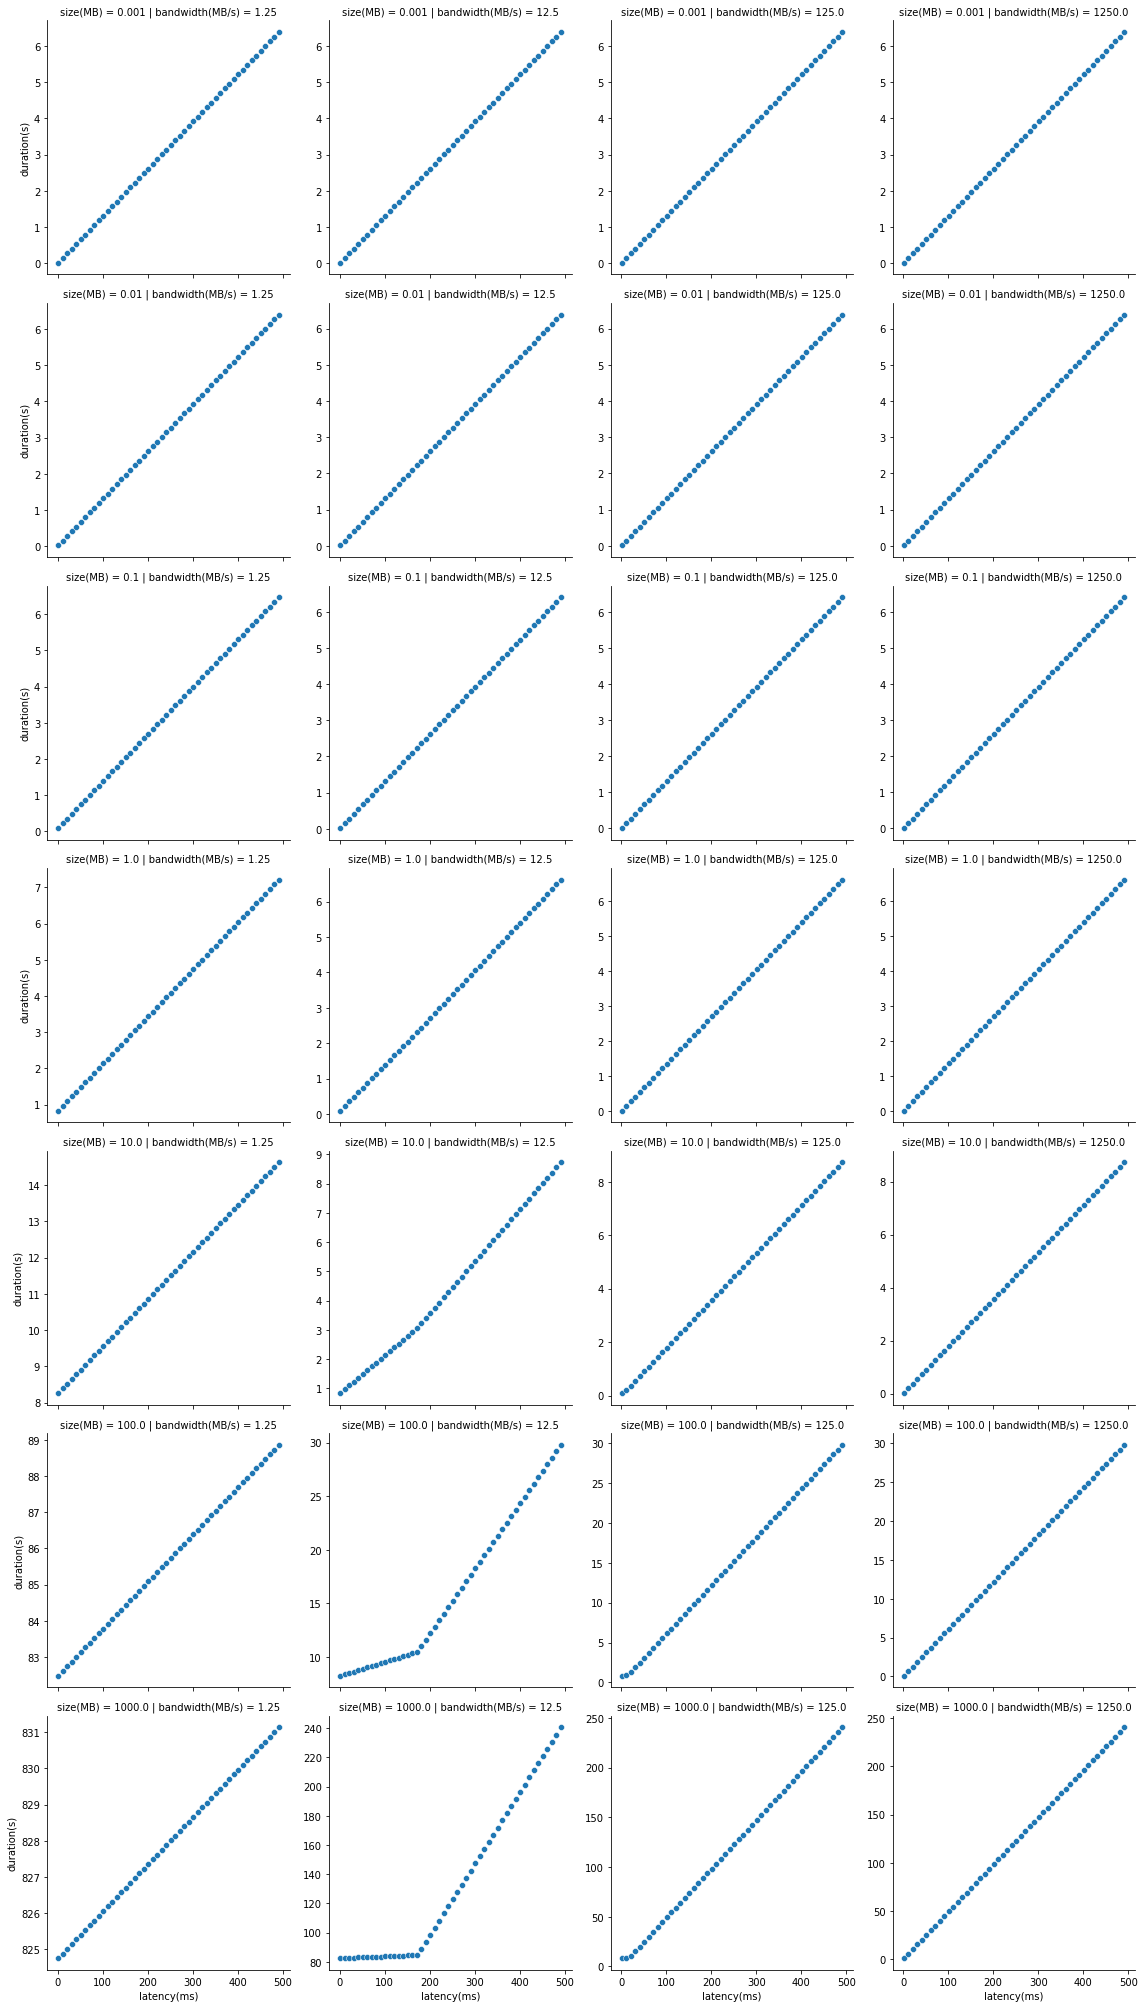

In [4]:

import seaborn as sns  
g = sns.FacetGrid(result, col="bandwidth(MB/s)", row="size(MB)", sharey=False, size=4)
g.map(sns.scatterplot, "latency(ms)", "duration(s)")

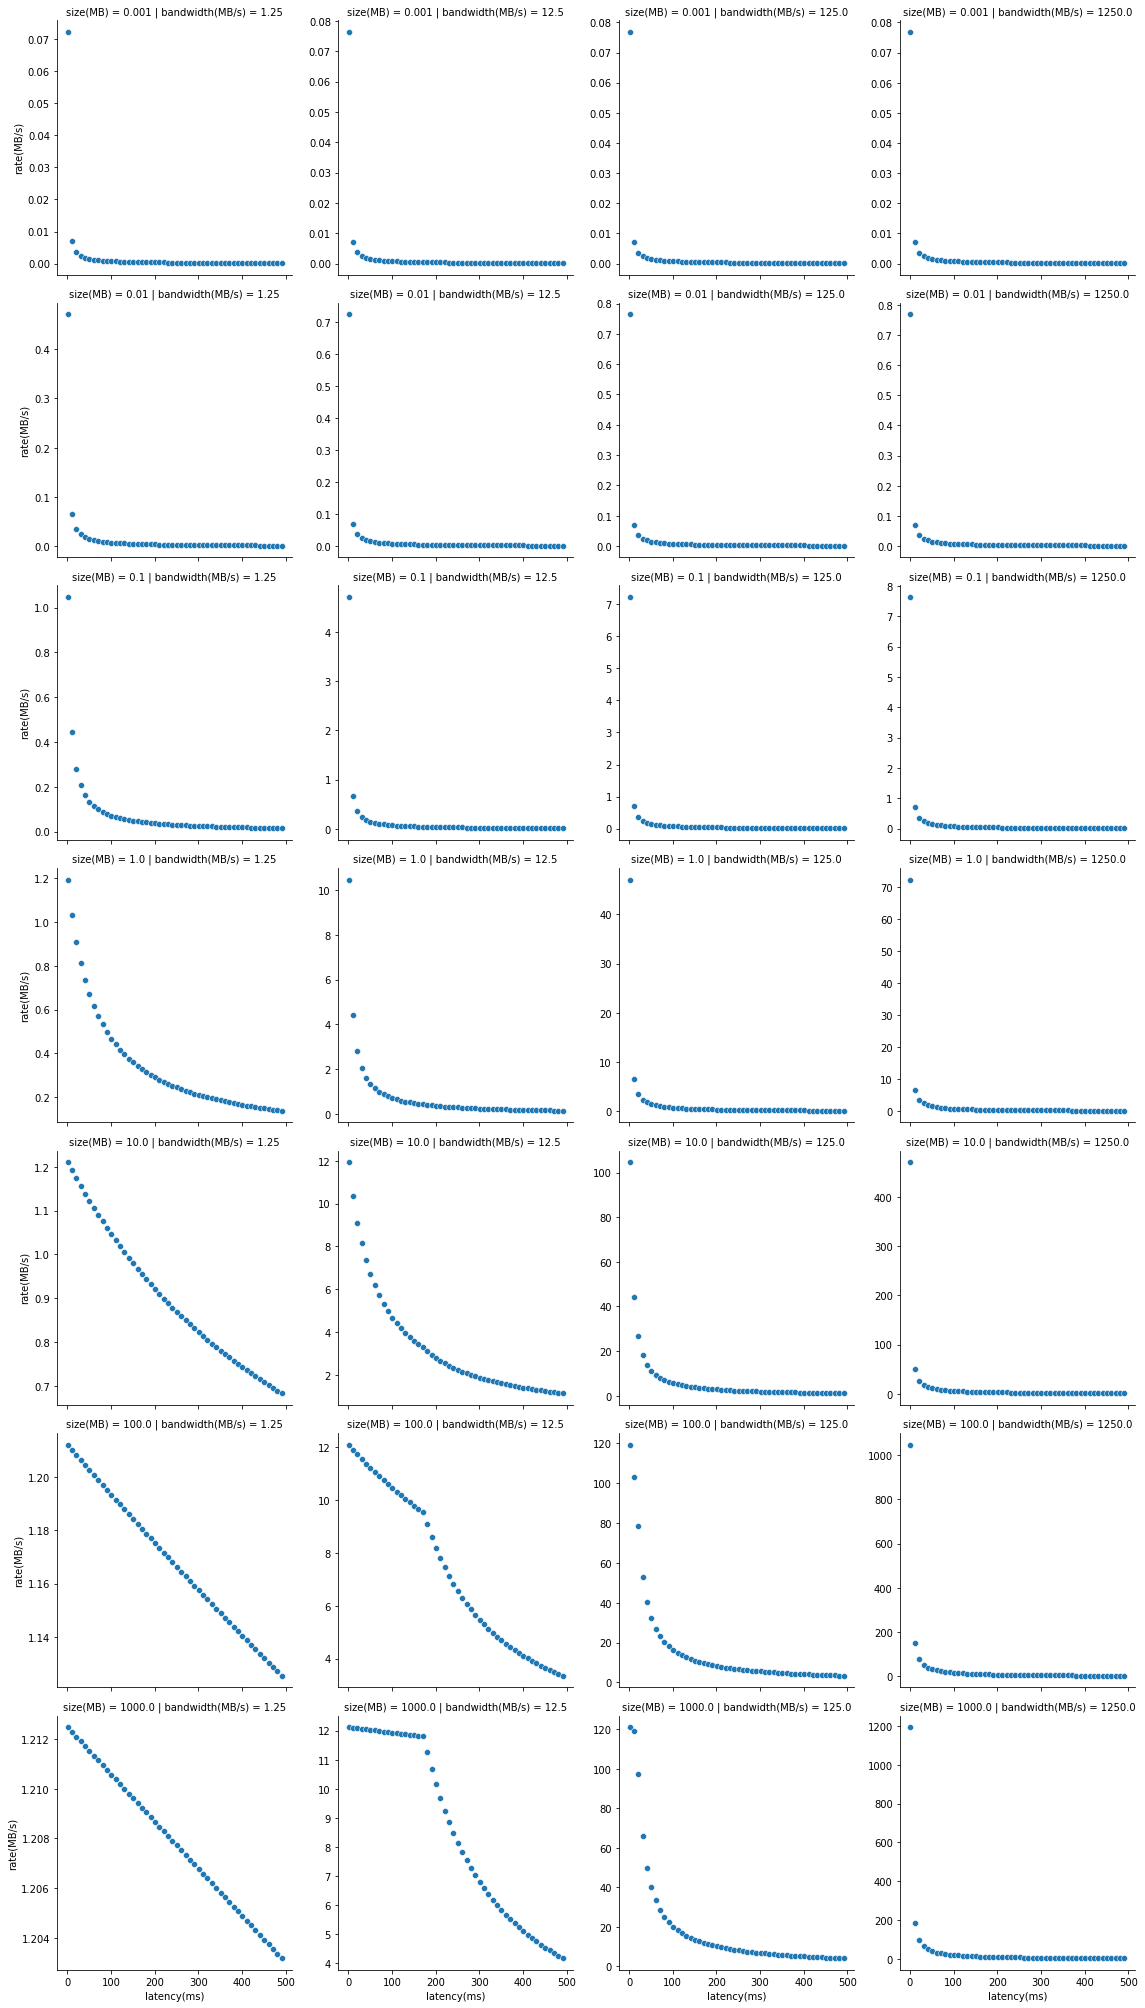

In [5]:
g = sns.FacetGrid(result, col="bandwidth(MB/s)", row="size(MB)", sharey=False, size=4)
g.map(sns.scatterplot, "latency(ms)", "rate(MB/s)")